# Data 3 - Power
#### - 從 2016-09-27 到 2017-09-01 的電力資料
#### - 北中南東各有兩個 columns ， 分別代表供給量及使用量 (Supply & Usage)
#### - 約每小時一筆資料

### Step 1: Transaction Definition

#### - Find the association rules between "Date", "Time", "NorthSupply",  "NorthUsage",   "SouthSupply",  "SouthUsage",  "EastSupply",  "EastUsage", "CenterSupply", and "CenterUsage" with support larger than 20% and confidence larger than 80%.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import time
from sklearn.cluster import KMeans
from pylab import rcParams
%matplotlib inline

power = pd.read_csv("power.csv")
power.head(200)

,Date,Time,NorthSupply,NorthUsage,CenterSupply,CenterUsage,SouthSupply,SouthUsage,EastSupply,EastUsage
0,2016-09-27,12:10,648.4,841.3,733.0,564.4,839.6,799.9,14.0,29.3
1,2016-09-27,13:10,601.3,826.4,725.4,535.9,827.3,777.9,14.0,27.6
2,2016-09-27,14:00,500.9,789.5,759.0,506.7,821.5,771.3,13.9,27.9
3,2016-09-27,15:10,516.1,773.6,717.1,450.8,744.2,737.3,13.9,29.5
4,2016-09-27,16:00,530.2,778.0,691.6,432.2,746.0,735.3,8.7,31.0
5,2016-09-27,17:00,546.3,783.1,703.0,449.1,751.7,739.4,4.7,34.1
6,2016-09-27,18:00,579.0,814.3,713.3,486.4,782.1,739.4,4.7,39.1
7,2016-09-27,19:00,604.3,812.4,701.2,478.0,745.1,725.2,4.7,39.6
8,2016-09-27,20:00,620.6,809.0,692.5,490.5,740.3,717.4,4.7,41.1
9,2016-09-27,21:00,616.1,796.6,688.8,487.1,714.3,699.2,4.7,41.1


In [2]:
power.describe()

,NorthSupply,NorthUsage,CenterSupply,CenterUsage,SouthSupply,SouthUsage,EastSupply,EastUsage
count,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000
mean,871.774059,970.082541,760.360231,708.192706,977.277937,901.751617,8.068531,37.453020
std,169.168890,206.794644,160.876822,103.979344,138.950242,115.564858,3.983699,6.158678
min,429.200000,574.600000,329.000000,420.700000,670.200000,604.500000,0.200000,23.200000
25%,750.500000,807.450000,638.475000,629.600000,869.975000,815.875000,4.600000,32.700000
50%,863.300000,950.900000,766.700000,702.150000,965.300000,897.700000,7.500000,37.100000
75%,998.500000,1110.400000,891.200000,788.225000,1069.225000,995.125000,11.200000,41.600000
max,1237.000000,1491.700000,1166.000000,947.000000,1365.000000,1175.900000,17.600000,52.400000


#### - Merge Date and Time into the new columns : DataTime
      - DataTime = "Date-Time"

#### - Manually divide the time into four groups : 
     (a). 00:00 - 06:00
     (b). 06:00 - 12:00
     (c). 12:00 - 18:00
     (d). 18:00 - 24:00

#### - Manually divide the date into 12 groups indexed by the months.
     e,g. Date : 2016-07-03, Date_Cluster = 07
     e,g. Date : 2016-09-23, Date_Cluster = 09

#### - q1 will be the transaction database for the processing afterwards.

In [3]:
import re

def IsNumber(s):
    try:
        if(str(s).lower() == 'nan'):
            return False
        float(s)
        return True
    except:
        return False

l = list(power['Date'])
l = [str(l[i])+"-"+str(x) for i, x in enumerate(power['Time'])]
power['DataTime'] = l

#Divide the time into four groups : [01:00, 06:00], [06:00, 12:00], [12:00, 18:00], [18:00, 24:00]
q1 = power.drop(['Date', 'Time'], axis=1)
l_power = list(power['Time'])

time_set = set().union(l_power)
#Hope to compare index instead of comparing string
time_set = sorted(time_set)
time_decoder = {i: k for i, k in enumerate(time_set)}
time_encoder = {k: i for i, k in enumerate(time_set)}

l = [time_encoder[x] for x in l_power]
l = ["00:00-06:00" if(x>=0 and x <=22) else x for x in l]
l = ["06:00-12:00" if(IsNumber(x) and (x>22 and x <=42)) else x for x in l]
l = ["12:00-18:00" if(IsNumber(x) and (x>42 and x <=60)) else x for x in l]
l = ["18:00-24:00" if(IsNumber(x) and (x>60)) else x for x in l]
q1['Time_Cluster'] = l

#Divide the date into 12 groups indexed by the month.
l_date = list(power['Date'])
pattern = re.compile(r'(\w*)\-(\w*)\-(\w*)')
l_month = [pattern.search(x).group(2) for x in l_date]
q1['Month'] = l_month
q1

,NorthSupply,NorthUsage,CenterSupply,CenterUsage,SouthSupply,SouthUsage,EastSupply,EastUsage,DataTime,Time_Cluster,Month
0,648.4,841.3,733.0,564.4,839.6,799.9,14.0,29.3,2016-09-27-12:10,12:00-18:00,09
1,601.3,826.4,725.4,535.9,827.3,777.9,14.0,27.6,2016-09-27-13:10,12:00-18:00,09
2,500.9,789.5,759.0,506.7,821.5,771.3,13.9,27.9,2016-09-27-14:00,12:00-18:00,09
3,516.1,773.6,717.1,450.8,744.2,737.3,13.9,29.5,2016-09-27-15:10,12:00-18:00,09
4,530.2,778.0,691.6,432.2,746.0,735.3,8.7,31.0,2016-09-27-16:00,12:00-18:00,09
5,546.3,783.1,703.0,449.1,751.7,739.4,4.7,34.1,2016-09-27-17:00,12:00-18:00,09
6,579.0,814.3,713.3,486.4,782.1,739.4,4.7,39.1,2016-09-27-18:00,12:00-18:00,09
7,604.3,812.4,701.2,478.0,745.1,725.2,4.7,39.6,2016-09-27-19:00,18:00-24:00,09
8,620.6,809.0,692.5,490.5,740.3,717.4,4.7,41.1,2016-09-27-20:00,18:00-24:00,09
9,616.1,796.6,688.8,487.1,714.3,699.2,4.7,41.1,2016-09-27-21:00,18:00-24:00,09


In [4]:
q1.groupby('Time_Cluster').count()

,NorthSupply,NorthUsage,CenterSupply,CenterUsage,SouthSupply,SouthUsage,EastSupply,EastUsage,DataTime,Month
Time_Cluster,,,,,,,,,,
00:00-06:00,1687,1687,1687,1687,1687,1687,1687,1687,1687,1687
06:00-12:00,1468,1468,1468,1468,1468,1468,1468,1468,1468,1468
12:00-18:00,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522
18:00-24:00,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383


In [5]:
q1.groupby('Month').count()

,NorthSupply,NorthUsage,CenterSupply,CenterUsage,SouthSupply,SouthUsage,EastSupply,EastUsage,DataTime,Time_Cluster
Month,,,,,,,,,,
01,562,562,562,562,562,562,562,562,562,562
04,277,277,277,277,277,277,277,277,277,277
05,744,744,744,744,744,744,744,744,744,744
06,719,719,719,719,719,719,719,719,719,719
07,719,719,719,719,719,719,719,719,719,719
08,746,746,746,746,746,746,746,746,746,746
09,109,109,109,109,109,109,109,109,109,109
10,730,730,730,730,730,730,730,730,730,730
11,710,710,710,710,710,710,710,710,710,710


In [6]:
print(f"len(q1) = {len(q1)}")

len(q1) = 6060


### Step 2: Observation & Discretization

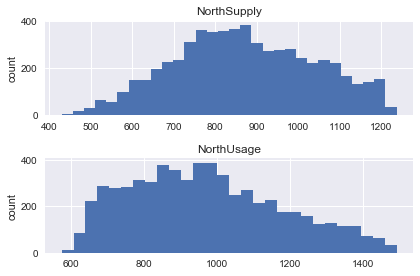

In [7]:
import seaborn as sns
sns.set()
fig, ax = plt.subplots(nrows=2)
features = ['NorthSupply', 'NorthUsage']
for i, f in enumerate(features):
    ax[i].hist(q1[f], bins = 'auto')
    ax[i].set_title(features[i])
    ax[i].set_ylabel('count')

fig.tight_layout()
plt.show()

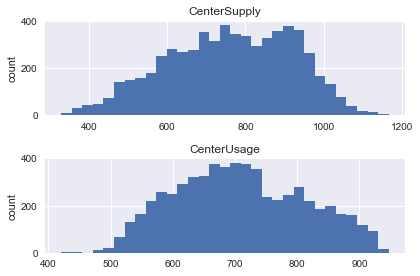

In [8]:
fig, ax = plt.subplots(nrows=2)
features = ['CenterSupply', 'CenterUsage']
for i, f in enumerate(features):
    ax[i].hist(q1[f], bins = 'auto')
    ax[i].set_title(features[i])
    ax[i].set_ylabel('count')

fig.tight_layout()
plt.show()

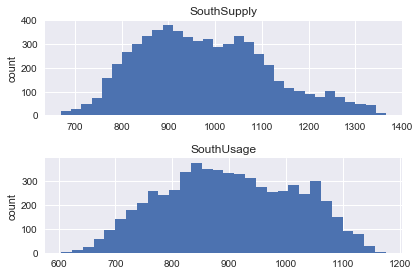

In [9]:
fig, ax = plt.subplots(nrows=2)
features = ['SouthSupply', 'SouthUsage']
for i, f in enumerate(features):
    ax[i].hist(q1[f], bins = 'auto')
    ax[i].set_title(features[i])
    ax[i].set_ylabel('count')

fig.tight_layout()
plt.show()

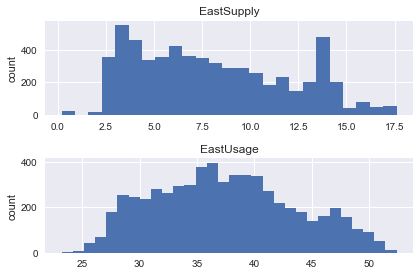

In [10]:
fig, ax = plt.subplots(nrows=2)
features = ['EastSupply', 'EastUsage']
for i, f in enumerate(features):
    ax[i].hist(q1[f], bins = 'auto')
    ax[i].set_title(features[i])
    ax[i].set_ylabel('count')

fig.tight_layout()
plt.show()

In [11]:
print(f"mean of NorthSupply  = {np.mean(q1['NorthSupply'])}")
print(f"mean of NorthUsage   = {np.mean(q1['NorthUsage'])}")
print(f"mean of CenterSupply = {np.mean(q1['CenterSupply'])}")
print(f"mean of CenterUsage  = {np.mean(q1['CenterUsage'])}")
print(f"mean of SouthSupply  = {np.mean(q1['SouthSupply'])}")
print(f"mean of SouthUsage   = {np.mean(q1['SouthUsage'])}")
print(f"mean of EastSupply   = {np.mean(q1['EastSupply'])}")
print(f"mean of EastUsage    = {np.mean(q1['EastUsage'])}")

mean of NorthSupply  = 871.7740594059431
mean of NorthUsage   = 970.0825412541236
mean of CenterSupply = 760.3602310231008
mean of CenterUsage  = 708.192706270626
mean of SouthSupply  = 977.2779372937325
mean of SouthUsage   = 901.7516171617149
mean of EastSupply   = 8.068531353135347
mean of EastUsage    = 37.45301980198014


In [12]:
q1.describe()

,NorthSupply,NorthUsage,CenterSupply,CenterUsage,SouthSupply,SouthUsage,EastSupply,EastUsage
count,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000
mean,871.774059,970.082541,760.360231,708.192706,977.277937,901.751617,8.068531,37.453020
std,169.168890,206.794644,160.876822,103.979344,138.950242,115.564858,3.983699,6.158678
min,429.200000,574.600000,329.000000,420.700000,670.200000,604.500000,0.200000,23.200000
25%,750.500000,807.450000,638.475000,629.600000,869.975000,815.875000,4.600000,32.700000
50%,863.300000,950.900000,766.700000,702.150000,965.300000,897.700000,7.500000,37.100000
75%,998.500000,1110.400000,891.200000,788.225000,1069.225000,995.125000,11.200000,41.600000
max,1237.000000,1491.700000,1166.000000,947.000000,1365.000000,1175.900000,17.600000,52.400000


#### - North Supply, North Usage, Sourth Supply, South Usage, Center Supply, Center Usage, East Supply and East Usage data are all similar to normal distributation(except that East Supply data has little glitch on extremely low(near value 3) and extremely high(near value 13) value). According to the statistic data, I use equal-fequency method with 4 clusters to do the discretization for these data. The four clusters for each category are as the following : 
    (a). North Supply
        - 高 : 998.5 - 1237
        - 中高 : 863.3 - 998.5
        - 中低 : 750.5 - 863.3
        - 低 :  429.2 - 750.5
    (b). North Usage
        - 高 : 1110.4 - 1491.7
        - 中高 : 950 - 1110.4
        - 中低 : 807.45 - 950
        - 低 :  574.6 - 807.45
    (c). Center Supply
        - 高 : 891.2 - 1166
        - 中高 : 766.7 - 891.2
        - 中低 : 638.475 - 766.7
        - 低 :  329 - 638.475
    (d). Center Usage
        - 高 : 788.225 - 947
        - 中高 : 702.15 - 788.225
        - 中低 : 629.6 - 702.15
        - 低 :  420.7 - 629.6
    (e). South Supply
        - 高 : 1069.225 - 1365
        - 中高 : 965.3 - 1069.225
        - 中低 : 869.975 - 965.3
        - 低 :  670.2 - 869.975
    (f). South Usage
        - 高 : 995.125 - 1175.9
        - 中高 : 897.7 - 995.125
        - 中低 : 815.875 - 897.7
        - 低 :  604.5 - 815.875
    (g). East Supply
        - 高 : 11.2 - 17.6
        - 中高 : 7.5 - 11.2
        - 中低 : 4.6 - 7.5
        - 低 :  0.2 - 4.6
    (h). East Usage
        - 高 : 41.6 - 52.4
        - 中高 : 37.1 - 41.6
        - 中低 : 32.7 - 37.1
        - 低 :  23.2 - 32.7   

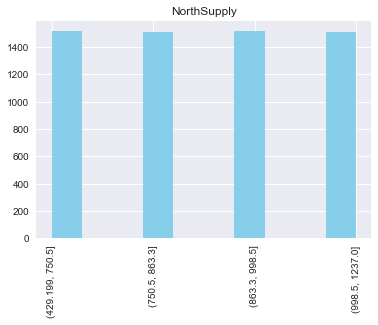

<Figure size 432x288 with 0 Axes>

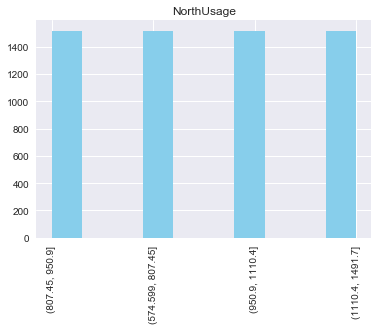

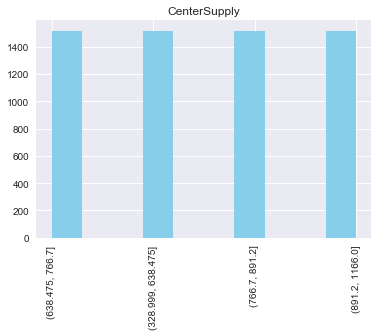

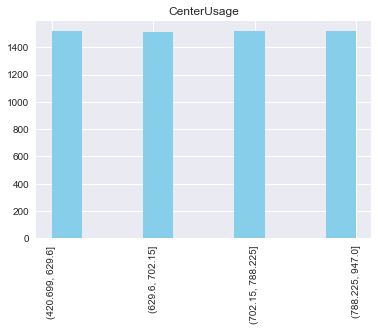

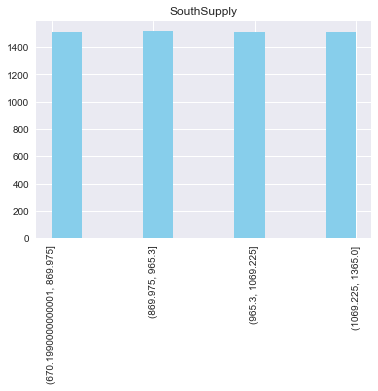

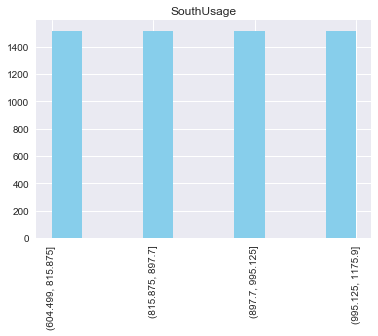

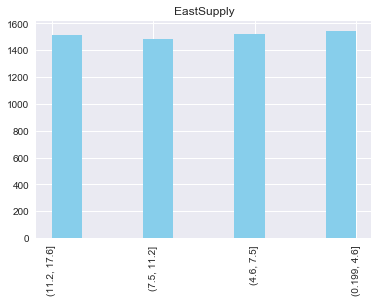

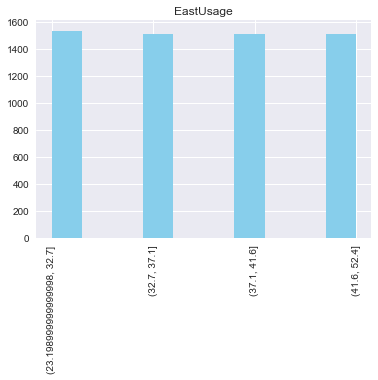

In [13]:
result = []
features_eng = ["NorthSupply", "NorthUsage", "CenterSupply", "CenterUsage", "SouthSupply", "SouthUsage", "EastSupply", "EastUsage"]
result.append(pd.qcut(q1['NorthSupply'], 4))
result.append(pd.qcut(q1['NorthUsage'], 4))
result.append(pd.qcut(q1['CenterSupply'], 4))
result.append(pd.qcut(q1['CenterUsage'], 4))
result.append(pd.qcut(q1['SouthSupply'], 4))
result.append(pd.qcut(q1['SouthUsage'], 4))
result.append(pd.qcut(q1['EastSupply'], 4))
result.append(pd.qcut(q1['EastUsage'], 4))

for i in range(len(result)):
    fig, ax = plt.subplots(1,1)
    result[i] = [str(x) for x in result[i]]
    plt.figure(i)
    ax.hist(result[i], color = 'skyblue')
    ax.set_title(features_eng[i])
    for tick in ax.get_xticklabels():
        tick.set_y(0)
        tick.set_rotation(90)

### Step3: find rules by FP-growth algorithm

用 orange3-associate 提供的 FP-growth algorithm 找 discretization 後的資料中的 rules

- 挑出support > 20%
- 挑出confidence > 80% 的 rules

In [14]:
q1.head(150)

,NorthSupply,NorthUsage,CenterSupply,CenterUsage,SouthSupply,SouthUsage,EastSupply,EastUsage,DataTime,Time_Cluster,Month
0,648.4,841.3,733.0,564.4,839.6,799.9,14.0,29.3,2016-09-27-12:10,12:00-18:00,09
1,601.3,826.4,725.4,535.9,827.3,777.9,14.0,27.6,2016-09-27-13:10,12:00-18:00,09
2,500.9,789.5,759.0,506.7,821.5,771.3,13.9,27.9,2016-09-27-14:00,12:00-18:00,09
3,516.1,773.6,717.1,450.8,744.2,737.3,13.9,29.5,2016-09-27-15:10,12:00-18:00,09
4,530.2,778.0,691.6,432.2,746.0,735.3,8.7,31.0,2016-09-27-16:00,12:00-18:00,09
5,546.3,783.1,703.0,449.1,751.7,739.4,4.7,34.1,2016-09-27-17:00,12:00-18:00,09
6,579.0,814.3,713.3,486.4,782.1,739.4,4.7,39.1,2016-09-27-18:00,12:00-18:00,09
7,604.3,812.4,701.2,478.0,745.1,725.2,4.7,39.6,2016-09-27-19:00,18:00-24:00,09
8,620.6,809.0,692.5,490.5,740.3,717.4,4.7,41.1,2016-09-27-20:00,18:00-24:00,09
9,616.1,796.6,688.8,487.1,714.3,699.2,4.7,41.1,2016-09-27-21:00,18:00-24:00,09


In [15]:
# 合併切過的資料
month_items = ['Month ' + str(x) for x in q1['Month']]
time_items = ['Time_Cluster ' + str(x) for x in q1['Time_Cluster']]
north_supply_items = ['North_Supply ' + x for x in result[0]]
north_usage_items = ['North_Usage'  + x for x in result[1]]
center_supply_items = ['Center_Supply ' + x for x in result[2]]
center_usage_items = ['Center_Usage'  + x for x in result[3]]
south_supply_items = ['South_Supply ' + x for x in result[4]]
south_usage_items = ['South_Usage'  + x for x in result[5]]
east_supply_items = ['East_Supply ' + x for x in result[6]]
east_usage_items = ['East_Usage'  + x for x in result[7]]

data_cut = []
data_cut.append(month_items)
data_cut.append(time_items)
data_cut.append(north_supply_items)
data_cut.append(north_usage_items)
data_cut.append(center_supply_items)
data_cut.append(center_usage_items)
data_cut.append(south_supply_items)
data_cut.append(south_usage_items)
data_cut.append(east_supply_items)
data_cut.append(east_usage_items)
transactions = list(zip(*data_cut))
transactions

[('Month 09',
  'Time_Cluster 12:00-18:00',
  'North_Supply (429.199, 750.5]',
  'North_Usage(807.45, 950.9]',
  'Center_Supply (638.475, 766.7]',
  'Center_Usage(420.699, 629.6]',
  'South_Supply (670.1990000000001, 869.975]',
  'South_Usage(604.499, 815.875]',
  'East_Supply (11.2, 17.6]',
  'East_Usage(23.198999999999998, 32.7]'),
 ('Month 09',
  'Time_Cluster 12:00-18:00',
  'North_Supply (429.199, 750.5]',
  'North_Usage(807.45, 950.9]',
  'Center_Supply (638.475, 766.7]',
  'Center_Usage(420.699, 629.6]',
  'South_Supply (670.1990000000001, 869.975]',
  'South_Usage(604.499, 815.875]',
  'East_Supply (11.2, 17.6]',
  'East_Usage(23.198999999999998, 32.7]'),
 ('Month 09',
  'Time_Cluster 12:00-18:00',
  'North_Supply (429.199, 750.5]',
  'North_Usage(574.599, 807.45]',
  'Center_Supply (638.475, 766.7]',
  'Center_Usage(420.699, 629.6]',
  'South_Supply (670.1990000000001, 869.975]',
  'South_Usage(604.499, 815.875]',
  'East_Supply (11.2, 17.6]',
  'East_Usage(23.198999999999998,

#### Fp-growth

Orange3 的 fpgrowth 只能處理整數，所以需要寫一個 encoder 和 decoder 來互相轉換

In [16]:
from orangecontrib.associate import fpgrowth as fpg

start = time.time()

# 建立一個 Set ，包含所有種類的 items
itemset = set().union(*transactions)
# 利用 itemset 建構 decoder 及 encoder
decoder = {i: k for i, k in enumerate(itemset)}
encoder = {k: i for i, k in enumerate(itemset)}

# 找出 frequent item set ，min_support 0.3，代表當一個 Pattern 出現 資料筆數*0.3 次時，即符合條件
itemsets =  dict(fpg.frequent_itemsets([[encoder[i] for i in t] for t in transactions], 0.20))
# 設定 min_confidence = 0.8 ，找出所有 rules
rules = list(fpg.association_rules(itemsets, 0.8))

print("Fpgrowth took", time.time() - start, "seconds.")
print(len(rules), "Results")

Fpgrowth took 0.26778125762939453 seconds.
38 Results


In [17]:
q1.describe()

,NorthSupply,NorthUsage,CenterSupply,CenterUsage,SouthSupply,SouthUsage,EastSupply,EastUsage
count,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000
mean,871.774059,970.082541,760.360231,708.192706,977.277937,901.751617,8.068531,37.453020
std,169.168890,206.794644,160.876822,103.979344,138.950242,115.564858,3.983699,6.158678
min,429.200000,574.600000,329.000000,420.700000,670.200000,604.500000,0.200000,23.200000
25%,750.500000,807.450000,638.475000,629.600000,869.975000,815.875000,4.600000,32.700000
50%,863.300000,950.900000,766.700000,702.150000,965.300000,897.700000,7.500000,37.100000
75%,998.500000,1110.400000,891.200000,788.225000,1069.225000,995.125000,11.200000,41.600000
max,1237.000000,1491.700000,1166.000000,947.000000,1365.000000,1175.900000,17.600000,52.400000


In [18]:
for rule in rules:
    a = [decoder[i] for i in rule[0]]
    b = [decoder[i] for i in rule[1]]
    s, c = rule[2], rule[3]
    print(a, ' -> ', b, c)

['Center_Usage(788.225, 947.0]', 'North_Usage(1110.4, 1491.7]']  ->  ['South_Usage(995.125, 1175.9]'] 0.9034635224760501
['South_Usage(995.125, 1175.9]', 'North_Usage(1110.4, 1491.7]']  ->  ['Center_Usage(788.225, 947.0]'] 0.9489164086687306
['North_Usage(1110.4, 1491.7]']  ->  ['South_Usage(995.125, 1175.9]', 'Center_Usage(788.225, 947.0]'] 0.809775429326288
['South_Usage(995.125, 1175.9]', 'Center_Usage(788.225, 947.0]']  ->  ['North_Usage(1110.4, 1491.7]'] 0.9423520368946964
['Center_Usage(788.225, 947.0]']  ->  ['South_Usage(995.125, 1175.9]', 'North_Usage(1110.4, 1491.7]'] 0.8092409240924092
['South_Usage(995.125, 1175.9]']  ->  ['Center_Usage(788.225, 947.0]', 'North_Usage(1110.4, 1491.7]'] 0.8092409240924092
['Center_Usage(788.225, 947.0]', 'North_Usage(1110.4, 1491.7]']  ->  ['North_Supply (998.5, 1237.0]'] 0.8983050847457628
['North_Usage(1110.4, 1491.7]']  ->  ['North_Supply (998.5, 1237.0]', 'Center_Usage(788.225, 947.0]'] 0.8051519154557464
['Center_Usage(788.225, 947.0]'] 

### Step 4: Explantion

- North Usage, South Usage和Center Usage只要其中一個很高, 另兩個也會很高
    - North Usage高 : 用電量介於1110.4 - 1491.7
    - South Usage高 : 用電量介於995.125 - 1175.9
    - Center Usage高 : 用電量介於788.225 - 947.0
- North Usage, South Usage和Center Usage只要其中一個很低, 另兩個也會很低
    - North Usage低 : 用電量介於574.599 - 807.45
    - South Usage低 : 用電量介於604.499 - 815.875
    - Center Usage低 : 用電量介於420.699 - 629.6
- North Usage低的話(574.599 - 807.45), East Usage也會低(23.198999999999998 - 32.7), 反之亦然
- 只要North Usage高, 或者South Usage高, 或者Center Usage高, 則North Supply就會高(998.5 - 1237.0), 反之亦然
- 只要North Usage高, 或者South Usage高, 或者Center Usage高, 則Center Supply就會高(891.2, 1166.0), 反之亦然